# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs: # lat_lng[0] => -19.466940600879013 = latitude lat_lng[1] => 132.06540421166608 = longtitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name # gets a city name based on the longtitude and latitude 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
    resp = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=harbin')
resp.json()

{'coord': {'lon': 126.62, 'lat': 45.77},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 39.2,
  'pressure': 1024,
  'humidity': 32,
  'temp_min': 39.2,
  'temp_max': 39.2},
 'visibility': 10000,
 'wind': {'speed': 17.9, 'deg': 20},
 'clouds': {'all': 0},
 'dt': 1572664458,
 'sys': {'type': 1,
  'id': 9678,
  'country': 'CN',
  'sunrise': 1572646426,
  'sunset': 1572682818},
 'timezone': 28800,
 'id': 2037013,
 'name': 'Harbin',
 'cod': 200}

In [64]:
for city in enumerate(cities):
    # enumerate(cities) => ((1,Toronto), (2, Harbin), (3, shanghai)) city[1] = 'shanghai' city [0] = 3
    time.sleep(0.2)
    resp = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q={}'.format(city[1]))
    #resp = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=' + city[1])

    if resp.status_code == 200: #only cities that exsist
        print ("City #: {} || City Name: {} || City Temp: {}".format(city[0], city[1], resp.json()['main']['temp']))


City #: 0 || City Name: albany || City Temp: 38.64
City #: 1 || City Name: busselton || City Temp: 66.22
City #: 2 || City Name: roebourne || City Temp: 88.02
City #: 3 || City Name: punta arenas || City Temp: 43.39
City #: 4 || City Name: college || City Temp: 26.85
City #: 5 || City Name: torbay || City Temp: 58.37
City #: 6 || City Name: thompson || City Temp: 23
City #: 7 || City Name: rikitea || City Temp: 72.18
City #: 8 || City Name: mataura || City Temp: 76.03
City #: 9 || City Name: norman wells || City Temp: 19.4
City #: 10 || City Name: byron bay || City Temp: 76.68
City #: 11 || City Name: cabo san lucas || City Temp: 76.32
City #: 13 || City Name: ilulissat || City Temp: 26.6
City #: 14 || City Name: cherskiy || City Temp: 16.86
City #: 15 || City Name: constantine || City Temp: 50
City #: 16 || City Name: yellowknife || City Temp: 22.64
City #: 18 || City Name: jamestown || City Temp: 71.62
City #: 19 || City Name: vaini || City Temp: 66.2
City #: 20 || City Name: bako ||

City #: 171 || City Name: ankang || City Temp: 62.17
City #: 172 || City Name: kyaka || City Temp: 69.8
City #: 173 || City Name: isangel || City Temp: 80.6
City #: 174 || City Name: nipawin || City Temp: 35.6
City #: 176 || City Name: iralaya || City Temp: 82.6
City #: 177 || City Name: ghanzi || City Temp: 66.92
City #: 178 || City Name: abu dhabi || City Temp: 82.4
City #: 180 || City Name: suleja || City Temp: 75.2
City #: 181 || City Name: hostotipaquillo || City Temp: 67.62
City #: 182 || City Name: chiredzi || City Temp: 65.05
City #: 183 || City Name: mayumba || City Temp: 78.64
City #: 184 || City Name: saskylakh || City Temp: -11.21
City #: 185 || City Name: san rafael || City Temp: 66.6
City #: 186 || City Name: tevaitoa || City Temp: 80.62
City #: 187 || City Name: esperance || City Temp: 57.2
City #: 188 || City Name: tuatapere || City Temp: 79.12
City #: 189 || City Name: margate || City Temp: 64.96
City #: 190 || City Name: khandyga || City Temp: 5.16
City #: 192 || City

City #: 333 || City Name: bagotville || City Temp: 76.62
City #: 334 || City Name: bonthe || City Temp: 77.18
City #: 335 || City Name: indramayu || City Temp: 87.91
City #: 336 || City Name: lima || City Temp: 64.4
City #: 337 || City Name: lata || City Temp: 36.09
City #: 338 || City Name: lakes entrance || City Temp: 80.11
City #: 339 || City Name: saint george || City Temp: 56.1
City #: 340 || City Name: shestakovo || City Temp: 33.82
City #: 342 || City Name: xining || City Temp: 42.44
City #: 343 || City Name: zhigalovo || City Temp: 30.34
City #: 344 || City Name: tibacuy || City Temp: 53.6
City #: 345 || City Name: arkhangelskoye || City Temp: 31.39
City #: 346 || City Name: ulladulla || City Temp: 83.73
City #: 347 || City Name: anadyr || City Temp: 19.4
City #: 348 || City Name: kumylzhenskaya || City Temp: 14.18
City #: 349 || City Name: road town || City Temp: 79.57
City #: 350 || City Name: norton || City Temp: 39.61
City #: 351 || City Name: fukue || City Temp: 64.56
City

City #: 494 || City Name: sandur || City Temp: 58.06
City #: 495 || City Name: saint-augustin || City Temp: 35.49
City #: 496 || City Name: bilma || City Temp: 76.06
City #: 497 || City Name: kalabo || City Temp: 72.88
City #: 498 || City Name: arman || City Temp: 36.03
City #: 499 || City Name: batagay || City Temp: 0.18
City #: 500 || City Name: bayan || City Temp: 40.71
City #: 501 || City Name: cilegon || City Temp: 89.28
City #: 502 || City Name: boralday || City Temp: 51.8
City #: 503 || City Name: buala || City Temp: 81.97
City #: 504 || City Name: koster || City Temp: 56.07
City #: 505 || City Name: jasidih || City Temp: 78.04
City #: 506 || City Name: kruisfontein || City Temp: 66.15
City #: 507 || City Name: kangaba || City Temp: 74.05
City #: 508 || City Name: sola || City Temp: 67.1
City #: 509 || City Name: evensk || City Temp: 30.11
City #: 510 || City Name: jesus maria || City Temp: 57.06
City #: 511 || City Name: blagoyevo || City Temp: 19.9
City #: 512 || City Name: va

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
import time
city_l = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []

for city in enumerate(cities):
    time.sleep(0.2)
    resp = requests.get('http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q={}'.format(city[1]))
    
    if resp.status_code == 200: #only cities that exsist
        print (city)
        city_l.append (city[1])
        temp.append (resp.json()['main']['temp'])
        humidity.append (resp.json()['main']['humidity'])
        cloudiness.append (resp.json()['clouds']['all'])
        wind_speed.append (resp.json()['wind']['speed'])
        lat.append (resp.json()['coord']['lat'])


(0, 'albany')
(1, 'busselton')
(2, 'roebourne')
(3, 'punta arenas')
(4, 'college')
(5, 'torbay')
(6, 'thompson')
(7, 'rikitea')
(8, 'mataura')
(9, 'norman wells')
(10, 'byron bay')
(11, 'cabo san lucas')
(13, 'ilulissat')
(14, 'cherskiy')
(15, 'constantine')
(16, 'yellowknife')
(18, 'jamestown')
(19, 'vaini')
(20, 'bako')
(21, 'hermanus')
(22, 'bluff')
(23, 'mogadishu')
(24, 'kapaa')
(26, 'saint-philippe')
(27, 'den helder')
(29, 'tasiilaq')
(30, 'khajuraho')
(31, 'ojinaga')
(32, 'westport')
(33, 'takapau')
(34, 'butaritari')
(35, 'chokurdakh')
(36, 'mnogovershinnyy')
(37, 'souillac')
(39, 'tucurui')
(40, 'touros')
(42, 'qaanaaq')
(43, 'kanigiri')
(44, 'puerto ayora')
(45, 'cape town')
(46, 'kropotkin')
(47, 'new norfolk')
(48, 'ushuaia')
(49, 'teknaf')
(50, 'alexandria')
(51, 'wum')
(52, 'montes altos')
(53, 'riyadh')
(54, 'vokhtoga')
(56, 'avarua')
(57, 'lesosibirsk')
(58, 'pevek')
(59, 'nikolskoye')
(60, 'matsusaka')
(61, 'ritchie')
(64, 'talnakh')
(65, 'rosetown')
(66, 'mar del pla

(496, 'bilma')
(497, 'kalabo')
(498, 'arman')
(499, 'batagay')
(500, 'bayan')
(501, 'cilegon')
(502, 'boralday')
(503, 'buala')
(504, 'koster')
(505, 'jasidih')
(506, 'kruisfontein')
(507, 'kangaba')
(508, 'sola')
(509, 'evensk')
(510, 'jesus maria')
(511, 'blagoyevo')
(512, 'vardo')
(513, 'rosario')
(514, 'etropole')
(515, 'chingirlau')
(516, 'bosaso')
(517, 'mercaderes')
(518, 'lompoc')
(519, 'chicama')
(520, 'qaqortoq')
(521, 'qianan')
(522, 'smithers')
(523, 'chaoyang')
(524, 'xuanzhou')
(525, 'port-gentil')
(526, 'yuncheng')
(527, 'mweka')
(529, 'alenquer')
(531, 'ocotal')
(532, 'nabire')
(533, 'palauig')
(534, 'ust-karsk')
(535, 'carrick-on-suir')
(536, 'curup')
(537, 'isla mujeres')
(538, 'half moon bay')
(539, 'maibong')
(540, 'les cayes')
(541, 'kota kinabalu')
(542, 'darhan')
(543, 'hurricane')
(544, 'raichur')
(545, 'verkhoyansk')
(546, 'uribia')
(547, 'kidal')
(548, 'povenets')
(550, 'ayan')
(551, 'maldonado')
(552, 'muros')
(553, 'namibe')
(554, 'egvekinot')
(555, 'flinder

In [76]:
city_l

['albany',
 'busselton',
 'roebourne',
 'punta arenas',
 'college',
 'torbay',
 'thompson',
 'rikitea',
 'mataura',
 'norman wells',
 'byron bay',
 'cabo san lucas',
 'ilulissat',
 'cherskiy',
 'constantine',
 'yellowknife',
 'jamestown',
 'vaini',
 'bako',
 'hermanus',
 'bluff',
 'mogadishu',
 'kapaa',
 'saint-philippe',
 'den helder',
 'tasiilaq',
 'khajuraho',
 'ojinaga',
 'westport',
 'takapau',
 'butaritari',
 'chokurdakh',
 'mnogovershinnyy',
 'souillac',
 'tucurui',
 'touros',
 'qaanaaq',
 'kanigiri',
 'puerto ayora',
 'cape town',
 'kropotkin',
 'new norfolk',
 'ushuaia',
 'teknaf',
 'alexandria',
 'wum',
 'montes altos',
 'riyadh',
 'vokhtoga',
 'avarua',
 'lesosibirsk',
 'pevek',
 'nikolskoye',
 'matsusaka',
 'ritchie',
 'talnakh',
 'rosetown',
 'mar del plata',
 'port alfred',
 'chuy',
 'bandarbeyla',
 'lewistown',
 'bethel',
 'rabo de peixe',
 'buraydah',
 'azare',
 'opuwo',
 'atuona',
 'kyaikto',
 'kieta',
 'leningradskiy',
 'hasaki',
 'dikson',
 'port elizabeth',
 'zhuhai

In [77]:
df_all_city_info = pd.DataFrame.from_dict({'city':city_l, 'temperature':temp, 'humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Latitude': lat})
list(df_all_city_info.columns)

['city', 'temperature', 'humidity', 'Cloudiness', 'Wind Speed', 'Latitude']

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

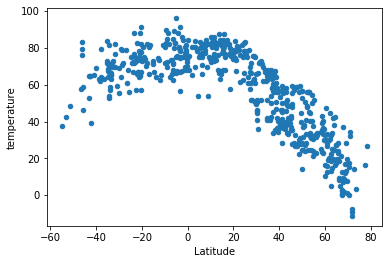

In [78]:
df_all_city_info.plot(kind = 'scatter', x = 'Latitude', y = 'temperature')

#### Latitude vs. Humidity Plot

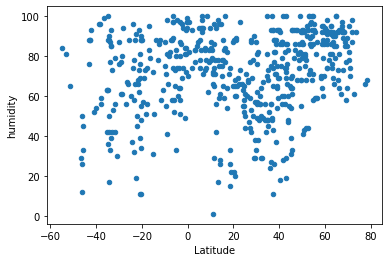

In [79]:
df_all_city_info.plot(kind = 'scatter', x = 'Latitude', y = 'humidity')

#### Latitude vs. Cloudiness Plot

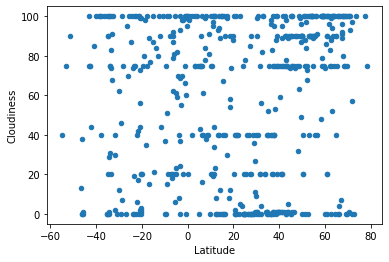

In [80]:
df_all_city_info.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness')

#### Latitude vs. Wind Speed Plot

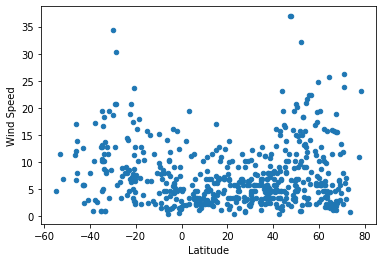

In [81]:
df_all_city_info.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed')